<a href="https://colab.research.google.com/github/Tanvir1772/Personal-Fitness-Tracker/blob/main/Personal_fitness_tracker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


--- Fitness Tracker Menu ---
1. Log a New Activity
2. View Weekly Summary
3. View Monthly Trends
4. Compare Goals
5. Set New Goals
6. Calculate BMI
7. Exit
Enter your choice: 3


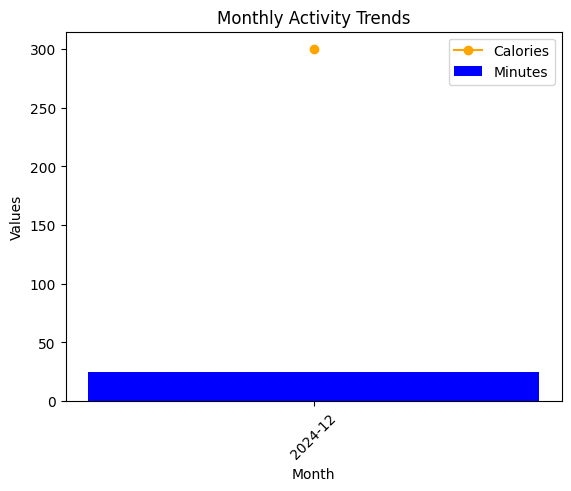


--- Fitness Tracker Menu ---
1. Log a New Activity
2. View Weekly Summary
3. View Monthly Trends
4. Compare Goals
5. Set New Goals
6. Calculate BMI
7. Exit
Enter your choice: 7


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Constants
CSV_FILE = 'fitness_activities.csv'
PRESET_ACTIVITIES = {
    "Running": 10,
    "Cycling": 8,
    "Yoga": 4,
    "Walking": 5,
    "Swimming": 12
}

# Function to load data from the CSV file
def load_data():
    try:
        data = pd.read_csv(CSV_FILE)
        data['Date'] = pd.to_datetime(data['Date'])
        return data
    except FileNotFoundError:
        print("No activity data found. Log some activities first.")
        return pd.DataFrame()

# Function to log new activity
def log_activity():
    date = input("Enter the date (YYYY-MM-DD): ")
    try:
        datetime.strptime(date, '%Y-%m-%d')
    except ValueError:
        print("Invalid date format.")
        return

    print("\nPreset Activities:")
    for i, activity in enumerate(PRESET_ACTIVITIES.keys(), 1):
        print(f"{i}. {activity}")
    choice = input("Select an activity or type 'custom': ").lower()

    if choice.isdigit() and 1 <= int(choice) <= len(PRESET_ACTIVITIES):
        activity = list(PRESET_ACTIVITIES.keys())[int(choice) - 1]
        calorie_rate = PRESET_ACTIVITIES[activity]
    elif choice == 'custom':
        activity = input("Enter activity name: ")
        calorie_rate = float(input("Calories burned per minute: "))
    else:
        print("Invalid choice.")
        return

    duration = int(input("Enter duration (minutes): "))
    calories_burned = calorie_rate * duration

    new_activity = pd.DataFrame({
        "Date": [date],
        "Activity Name": [activity],
        "Duration (minutes)": [duration],
        "Calories Burned": [calories_burned]
    })

    try:
        existing_data = pd.read_csv(CSV_FILE)
        updated_data = pd.concat([existing_data, new_activity], ignore_index=True)
    except FileNotFoundError:
        updated_data = new_activity

    updated_data.to_csv(CSV_FILE, index=False)
    print(f"Activity '{activity}' logged successfully!")

# Function to display weekly summary of activities
def weekly_summary(data):
    today = datetime.today().replace(hour=0, minute=0, second=0, microsecond=0)
    start_of_week = today - timedelta(days=today.weekday())
    end_of_week = start_of_week + timedelta(days=6)

    data['Date'] = data['Date'].dt.normalize()
    weekly_data = data[(data['Date'] >= start_of_week) & (data['Date'] <= end_of_week)]

    total_duration = weekly_data['Duration (minutes)'].sum()
    total_calories = weekly_data['Calories Burned'].sum()

    print(f"\nWeekly Summary ({start_of_week.strftime('%Y-%m-%d')} to {end_of_week.strftime('%Y-%m-%d')}):")
    print(f"Total Duration: {total_duration} minutes")
    print(f"Total Calories: {total_calories} kcal")

# Function to display monthly trends with graphs
def monthly_trends(data):
    data['Month'] = data['Date'].dt.to_period('M')
    monthly_summary = data.groupby('Month')[['Duration (minutes)', 'Calories Burned']].sum()

    plt.bar(monthly_summary.index.astype(str), monthly_summary['Duration (minutes)'], label='Minutes', color='blue')
    plt.plot(monthly_summary.index.astype(str), monthly_summary['Calories Burned'], marker='o', label='Calories', color='orange')
    plt.title('Monthly Activity Trends')
    plt.xlabel('Month')
    plt.ylabel('Values')
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

# Function to compare goals with actual performance
def compare_goals(data, weekly_goal, daily_goal):
    today = datetime.today()
    start_of_week = today - timedelta(days=today.weekday())

    weekly_data = data[(data['Date'] >= start_of_week) & (data['Date'] <= today)]
    weekly_duration = weekly_data['Duration (minutes)'].sum()

    daily_data = data[data['Date'] == today.strftime('%Y-%m-%d')]
    daily_calories = daily_data['Calories Burned'].sum()

    print(f"Weekly Goal: {weekly_goal} minutes | Actual: {weekly_duration} minutes")
    print(f"Daily Goal: {daily_goal} calories | Actual: {daily_calories} calories")

    if weekly_duration >= weekly_goal:
        print("Weekly goal achieved!")
    else:
        print(f"{weekly_goal - weekly_duration} minutes to meet weekly goal.")

    if daily_calories >= daily_goal:
        print("Daily goal achieved!")
    else:
        print(f"{daily_goal - daily_calories} calories to meet daily goal.")

# Function to calculate BMI
def calculate_bmi():
    height = float(input("Enter height (in meters): "))
    weight = float(input("Enter weight (in kg): "))
    bmi = weight / (height ** 2)
    print(f"Your BMI: {bmi:.2f}")
    if bmi < 18.5:
        print("Underweight: Include strength training and high-calorie diet.")
    elif 18.5 <= bmi < 24.9:
        print("Normal: Maintain with regular exercise.")
    elif 25 <= bmi < 29.9:
        print("Overweight: Focus on cardio and reduce caloric intake.")
    else:
        print("Obese: Consult a healthcare provider for a personalized plan.")

# Function to set fitness goals
def set_goals():
    weekly_goal = int(input("Set your weekly duration goal (minutes): "))
    daily_goal = int(input("Set your daily calorie goal (calories): "))
    return weekly_goal, daily_goal

# Function to provide the user interface
def main():
    data = load_data()
    weekly_goal, daily_goal = 150, 500  # Default goals

    while True:
        print("\n--- Fitness Tracker Menu ---")
        print("1. Log a New Activity")
        print("2. View Weekly Summary")
        print("3. View Monthly Trends")
        print("4. Compare Goals")
        print("5. Set New Goals")
        print("6. Calculate BMI")
        print("7. Exit")

        choice = input("Enter your choice: ")
        if choice == '1':
            log_activity()
        elif choice == '2':
            weekly_summary(data)
        elif choice == '3':
            monthly_trends(data)
        elif choice == '4':
            compare_goals(data, weekly_goal, daily_goal)
        elif choice == '5':
            weekly_goal, daily_goal = set_goals()
        elif choice == '6':
            calculate_bmi()
        elif choice == '7':
            break
        else:
            print("Invalid choice. Please try again.")

# Running the program
if __name__ == "__main__":
    main()
